In [162]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
%autoreload 2

In [164]:
%matplotlib inline

In [165]:
from eval import play
from play_rl.policy import Policy
from play_rl.wrappers import GridGame
from play_rl.env import Env
from random import choice
from gan.level_visualizer import LevelVisualizer
from gan.utils import tensor_to_level_str
import numpy as np
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython import display
from play_rl.zelda_astar import play_astar


Connecting to host 127.0.0.1 at port 41209 ...
Client connected to server [OK]
zelda_672


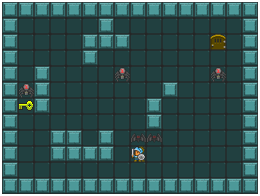

1.99 61


In [167]:

game_name = 'zelda'
device = torch.device('cpu')
env_def = Env(name=game_name)
level_visualizer = LevelVisualizer(env_def)
env = GridGame(game_name=game_name,play_length=100,shape=env_def.state_shape)

def show(level_str):
    p_level_img = np.array(level_visualizer.draw_level(level_str))
    image = Image.fromarray(p_level_img)
    image.show()

actor = Policy(obs_shape=env.observation_space.shape, action_space=env.action_space,
               base_kwargs={"recurrent": True}).to(device=device)
actor.load_state_dict(torch.load(
    "/root/mnt/GVGAI-GAN/play_rl/checkpoints/ppo/zelda_20220825102126.pt"))

levels_dir = '/root/mnt/GVGAI-GAN/gan/data/level/zelda/generated/'

files = os.listdir(levels_dir)

file = choice(files)
print(file)
with open(f'/root/mnt/GVGAI-GAN/gan/data/level/zelda/generated/{file}',mode='r') as f:
    level_str = f.read()
show(level_str)
# reward,step,frames = play(level_str=level_str,env=env,actor=actor,visualize=True,env_def=env_def)
reward,step,frames = play_astar(level_str=level_str,env=env,visualize=True,env_def=env_def)

ims = []
print(reward,step)
fig = plt.figure()
for f in frames:
    ims.append([plt.imshow(f)])
anim = animation.ArtistAnimation(fig,ims,interval=300)
html = display.HTML(anim.to_jshtml())
display.display(html)
plt.close()